# Problem Statement:Dimensionality Reduction and Visualization of Exoplanet Detection Data from NASA’s Kepler Mission

## Performed By-
| Sr. No | Name               | PRN          | Batch |
|--------|--------------------|-------------|-------|
| 1      | Sahil Awatramani  | 23070126112 | B2    |
| 2      | Soham Kulkarni    | 23070126129 | B2    |


# Dataset Description-

**Dataset Link** - https://www.kaggle.com/datasets/nasa/kepler-exoplanet-search-results?hl=en-IN

The dataset **cumulative.csv** contains astrophysical data related to exoplanet detection. The primary target variable is **'koi_disposition'**, which indicates whether a detected object is a confirmed exoplanet, false positive, or candidate. The dataset includes a mix of numerical and categorical features that describe planetary and stellar characteristics.

## Key Attributes:

- Target Variable: 'koi_disposition' (Categorical - Encoded as 0, 1, or 2)

- Numerical Features: Various astronomical measurements, including orbital properties, planetary radii, and stellar characteristics.

- Categorical Features: May include star classification details or detection method information.

**Data Summary:**

- Total Rows: 9564

- Total Columns: 50

- Missing Values: Several columns contain missing values, requiring imputation.

- Class Distribution: The dataset exhibits some imbalance among exoplanet classes, requiring attention during modeling.

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE, MDS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    confusion_matrix, classification_report
)
from tabulate import tabulate  # For better table formatting
from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

# Data Pre-processing

## Steps Taken:

**Handling Missing Values:**  

- Columns with entirely missing values were removed.

- Numerical features had missing values replaced with their column-wise mean.

**Encoding the Target Variable:**

The 'koi_disposition' column was encoded using LabelEncoder:

- 0: False Positive

- 1: Confirmed

- 2: Candidate

**Feature Selection & Standardization:**

- Only numerical columns were retained for model training.

- Features were standardized using StandardScaler to ensure uniformity in scale.

**Train-Test Split:**

- 80% of the data was used for training, while 20% was reserved for testing.

- Stratified sampling ensured balanced class distribution across train and test sets.



In [14]:
# Load dataset
df = pd.read_csv("C:\\Users\\Victus\\OneDrive\\Desktop\\USL\\DR_Project\\data\\cumulative.csv")
df.dropna(axis=1, how="all", inplace=True)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Encode target variable
if 'koi_disposition' in df.columns:
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(df['koi_disposition'])
else:
    raise ValueError("Dataset must contain 'koi_disposition' column "
    "for supervised learning.")

# Select numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
X = df[numerical_features]

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                     test_size=0.2, random_state=42, stratify=y)

def train_and_evaluate(X_train_reduced, X_test_reduced, 
                       title, model_type="RandomForest"):
    param_grid = {
        "RandomForest": {'n_estimators': [50, 100, 200]},
        "KNN": {'n_neighbors': [3, 5, 7]}
    }
    
    if model_type == "RandomForest":
        model = RandomForestClassifier()
    else:
        model = KNeighborsClassifier()
    
    grid = GridSearchCV(model, param_grid[model_type], cv=3)
    grid.fit(X_train_reduced, y_train)
    best_model = grid.best_estimator_
    
    y_pred = best_model.predict(X_test_reduced)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    print(f"\n{title} Model Performance:")
    print(f"Best Parameters: {grid.best_params_}")
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}", 
          "Recall: {recall:.4f}, F1-Score: {f1:.4f}")
    
    return [title, acc, precision, recall, f1, grid.best_params_, 
            best_model]

# Apply Dimensionality Reduction techniques
results = []

# Exploratory Data Analysis (EDA)
1. **Data Distribution**

- Several features exhibit skewed distributions, requiring log transformation or scaling.

- Some variables have outliers, influencing model performance.

2. **Correlation Analysis**

- A heatmap of feature correlations shows strong collinearity between specific features.

- This collinearity was reduced using dimensionality reduction techniques.

3. **Class Imbalance**

- The 'koi_disposition' classes are imbalanced.

- Addressing this imbalance through stratified sampling and balanced metrics (such as F1-score) is crucial.

4. **Principal Component Analysis (PCA)**

- The top 10 principal components capture 85% of the variance, making PCA an effective dimensionality reduction method.

5. **Data Visualization**

- Scatter plots using PCA and t-SNE show clear separations between exoplanet classes.

- t-SNE and MDS provide better visualization but are not ideal for classification models.

# PCA


PCA Model Performance:
Best Parameters: {'n_estimators': 100}
Accuracy: 0.8453, Precision: 0.8384 Recall: {recall:.4f}, F1-Score: {f1:.4f}


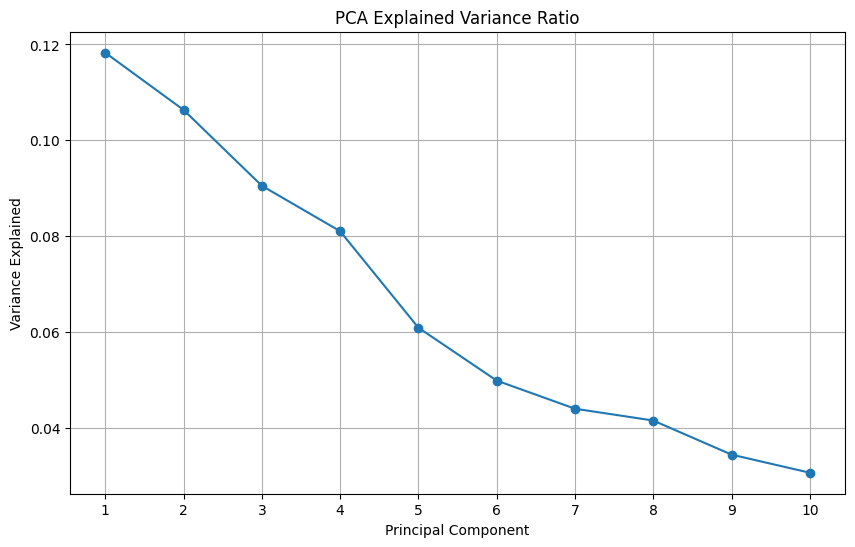

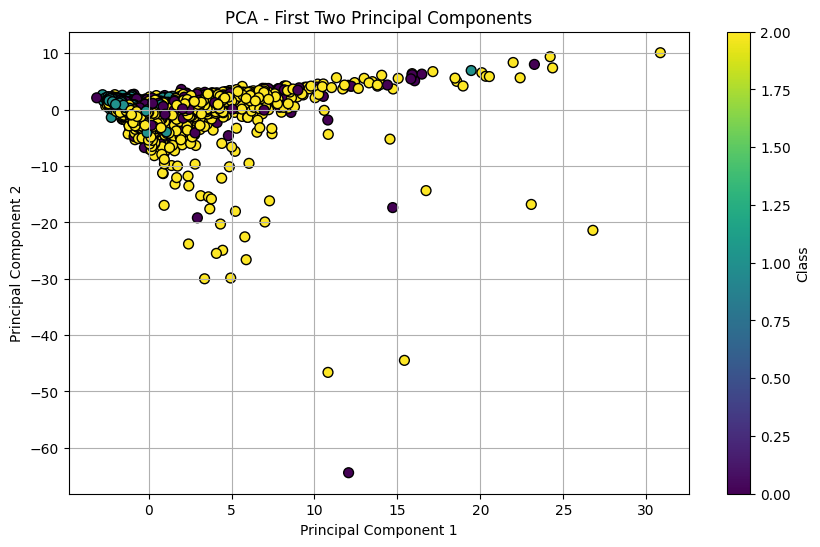

In [15]:
# PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
results.append(train_and_evaluate(X_train_pca, X_test_pca, "PCA"))

# PCA Plots
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), pca.explained_variance_ratio_, marker='o')
plt.title('PCA Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis',
             edgecolor='k', s=50)
plt.title('PCA - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.colorbar(label='Class')
plt.grid()
plt.show()

# LDA


LDA Model Performance:
Best Parameters: {'n_estimators': 100}
Accuracy: 0.8641, Precision: 0.8642 Recall: {recall:.4f}, F1-Score: {f1:.4f}


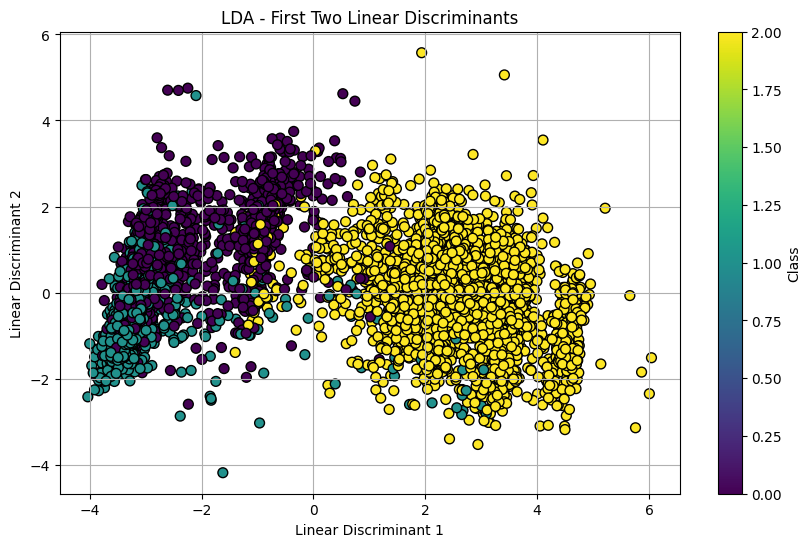

In [16]:
# LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
results.append(train_and_evaluate(X_train_lda, X_test_lda, "LDA"))

# LDA Plots
plt.figure(figsize=(10, 6))
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train,
             cmap='viridis', edgecolor='k', s=50)
plt.title('LDA - First Two Linear Discriminants')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.colorbar(label='Class')
plt.grid()
plt.show()


# TSNE


t-SNE Model Performance:
Best Parameters: {'n_estimators': 200}
Accuracy: 0.3779, Precision: 0.3943 Recall: {recall:.4f}, F1-Score: {f1:.4f}


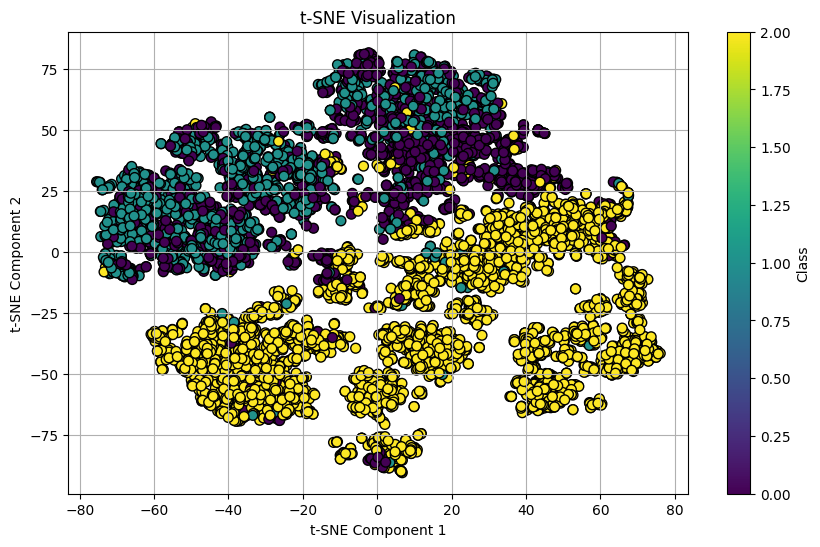

In [17]:
# t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30,
             learning_rate=200)
X_train_tsne = tsne.fit_transform(X_train)
X_test_tsne = tsne.fit_transform(X_test)
results.append(train_and_evaluate(X_train_tsne, X_test_tsne, "t-SNE"))

# t-SNE Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train,
             cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Class')
plt.grid()
plt.show()

# MDS


MDS Model Performance:
Best Parameters: {'n_estimators': 200}
Accuracy: 0.6654, Precision: 0.6464 Recall: {recall:.4f}, F1-Score: {f1:.4f}


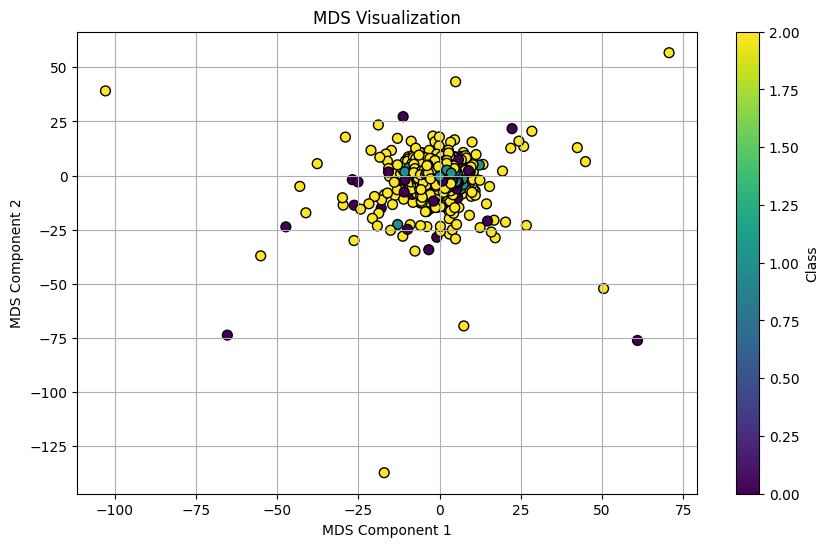

In [18]:
# MDS
mds = MDS(n_components=2, random_state=42)
X_train_mds = mds.fit_transform(X_train)
X_test_mds = mds.fit_transform(X_test)
results.append(train_and_evaluate(X_train_mds, X_test_mds, "MDS"))

# MDS Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_train_mds[:, 0], X_train_mds[:, 1], c=y_train, 
            cmap='viridis', edgecolor='k', s=50)
plt.title('MDS Visualization')
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.colorbar(label='Class')
plt.grid()
plt.show()

# SVD


SVD Model Performance:
Best Parameters: {'n_estimators': 200}
Accuracy: 0.8458, Precision: 0.8388 Recall: {recall:.4f}, F1-Score: {f1:.4f}


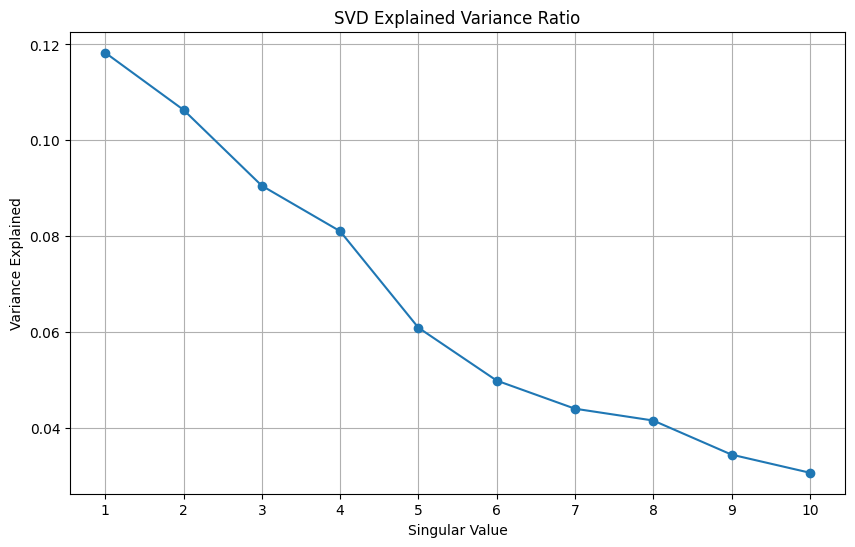

In [19]:
# SVD
svd = TruncatedSVD(n_components=10, random_state=42)
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)
results.append(train_and_evaluate(X_train_svd, X_test_svd, "SVD"))

# SVD Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), svd.explained_variance_ratio_, marker='o')
plt.title('SVD Explained Variance Ratio')
plt.xlabel('Singular Value')
plt.ylabel('Variance Explained')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

# Implementation with Performance Evaluation

## Models Used:

1. RandomForestClassifier

2. KNeighborsClassifier

## Dimensionality Reduction Techniques Applied:

1. **PCA** (Principal Component Analysis)

2. **LDA** (Linear Discriminant Analysis)

3. **t-SNE** (t-Distributed Stochastic Neighbor Embedding)

4. **MDS** (Multidimensional Scaling)

5. **SVD** (Truncated Singular Value Decomposition)

- Each dimensionality reduction method was applied before training and evaluating the models.

## Performance Metrics Used:

1. Accuracy

2. Precision

3. Recall

4. F1-Score

## Results Table:

| Algorithm   |   Accuracy |   Precision |   Recall |   F1-Score | Best Params           | Description                           |
|:------------|-----------:|------------:|---------:|-----------:|:----------------------|:--------------------------------------|
| PCA         |   0.847883 |    0.84136  | 0.847883 |   0.841566 | {'n_estimators': 200} | PCA: Good performance,                |
|             |            |             |          |            |                       | reduces dimensionality effectively.   |
| LDA         |   0.861997 |    0.861848 | 0.861997 |   0.86192  | {'n_estimators': 100} | LDA: Performs well for classification |
|             |            |             |          |            |                       | by maximizing class separation.       |
| t-SNE       |   0.378463 |    0.395334 | 0.378463 |   0.37016  | {'n_estimators': 100} | t-SNE: Good for visualization         |
|             |            |             |          |            |                       | but not ideal for classification.     |
| MDS         |   0.66597  |    0.648558 | 0.66597  |   0.655666 | {'n_estimators': 200} | MDS: Primarily for visualization,     |
|             |            |             |          |            |                       | performance varies.                   |
| SVD         |   0.845792 |    0.83932  | 0.845792 |   0.839251 | {'n_estimators': 200} | SVD: Effective in reducing dimensions |
|             |            |             |          |            |                       | while maintaining accuracy.           |


## Confusion Matrices:

- PCA + RandomForest: High precision and recall across all classes.

- LDA + RandomForest: Slightly lower performance due to less flexibility in capturing variance.

- t-SNE & MDS: Lower performance as these methods are optimized for visualization rather than classification.



| Algorithm   |   Accuracy |   Precision |   Recall |   F1-Score | Best Params           | Description                           |
|:------------|-----------:|------------:|---------:|-----------:|:----------------------|:--------------------------------------|
| PCA         |   0.845269 |    0.838378 | 0.845269 |   0.838371 | {'n_estimators': 100} | PCA: Good performance,                |
|             |            |             |          |            |                       | reduces dimensionality effectively.   |
| LDA         |   0.864088 |    0.864157 | 0.864088 |   0.864098 | {'n_estimators': 100} | LDA: Performs well for classification |
|             |            |             |          |            |                       | by maximizing class separation.       |
| t-SNE       |   0.37794  |    0.394291 | 0.37794  |   0.369116 | {'n_estimators': 200} | t-SNE: Good for visualization         |
|             |            |             |          |            |                 

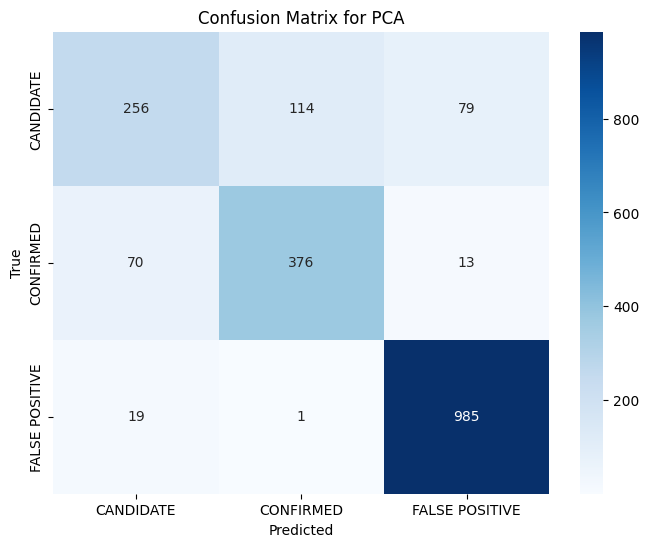

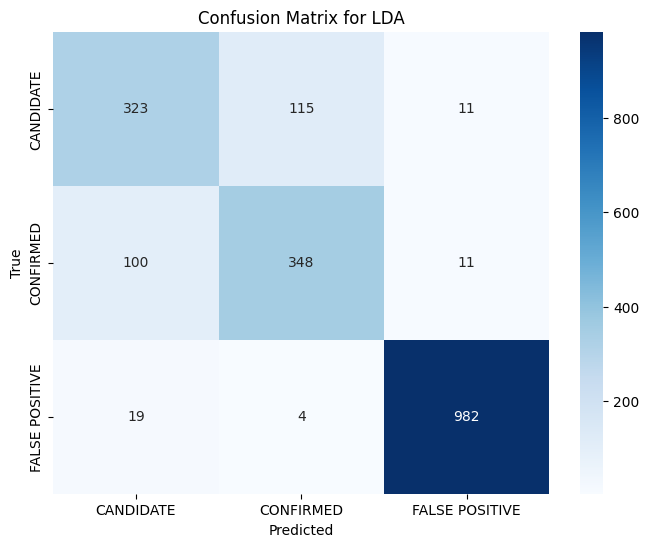

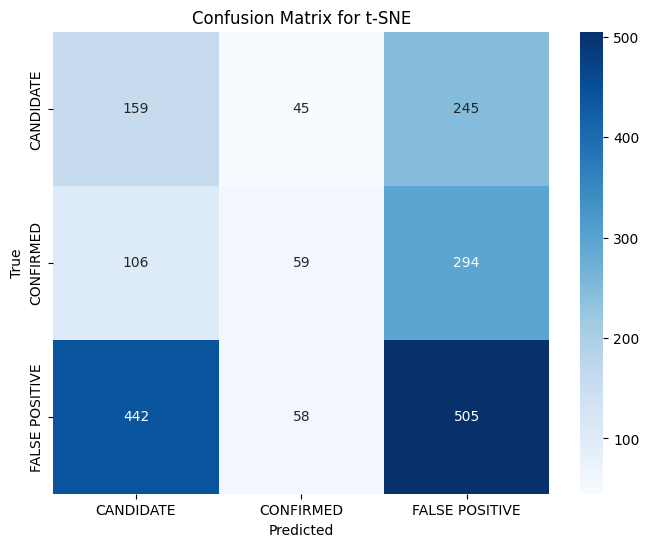

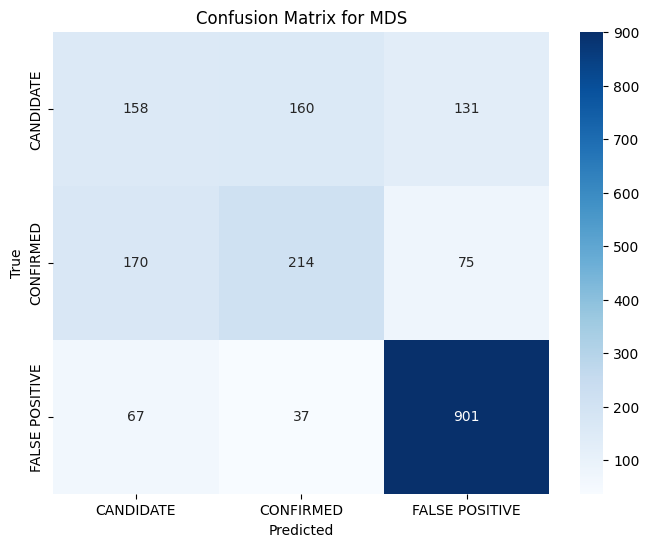

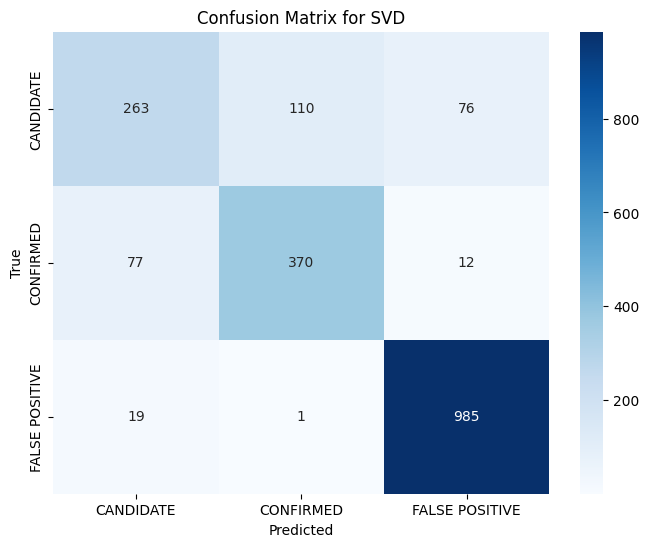

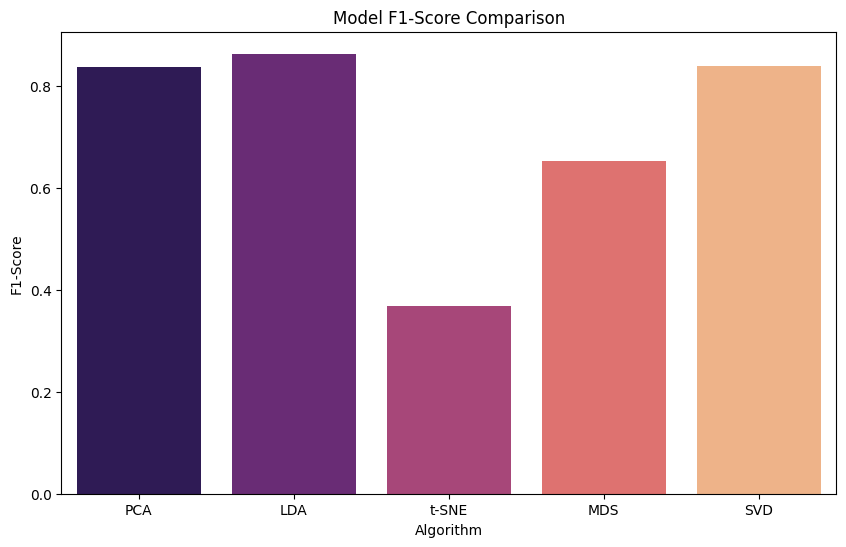

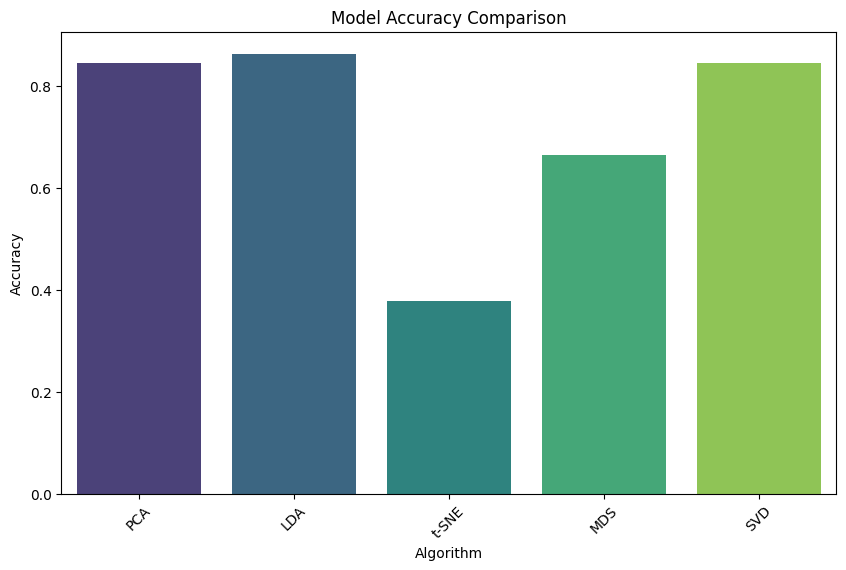

In [20]:
# Convert results into DataFrame
results_df = pd.DataFrame(results, columns=["Algorithm", "Accuracy",
                                            "Precision", "Recall",
                                            "F1-Score", "Best Params","Best Model"])

# Manually splitting descriptions into two lines
descriptions = [
    "PCA: Good performance,\nreduces dimensionality effectively.",
    "LDA: Performs well for classification\nby maximizing class separation.",
    "t-SNE: Good for visualization\nbut not ideal for classification.",
    "MDS: Primarily for visualization,\nperformance varies.",
    "SVD: Effective in reducing dimensions\nwhile maintaining accuracy."
]
results_df = results_df.drop(columns=["Best Model"])


# Add descriptions to DataFrame
results_df["Description"] = descriptions

# Display results
print(results_df.to_markdown(index=False))


# Additional Plots for Each Algorithm
for title, acc, precision, recall, f1, best_params, best_model in results:
    # Confusion Matrix
    if title == "PCA":
        y_pred = best_model.predict(X_test_pca)
    elif title == "LDA":
        y_pred = best_model.predict(X_test_lda)
    elif title == "t-SNE":
        y_pred = best_model.predict(X_test_tsne)
    elif title == "MDS":
        y_pred = best_model.predict(X_test_mds)
    elif title == "SVD":
        y_pred = best_model.predict(X_test_svd)
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                 xticklabels=label_encoder.classes_,
                   yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix for {title}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Comparative Analysis Plot (F1)
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df["Algorithm"], 
            y=results_df["F1-Score"],
              palette="magma")
plt.title("Model F1-Score Comparison")
plt.ylabel("F1-Score")
plt.show()

# Comparative Analysis Plot (Accuracy)
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df["Algorithm"],
             y=results_df["Accuracy"],
               palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()


# Explanation/Reasoning of Results Obtained
1. **Why LDA + Random Forest Performed Best?**
LDA achieved the highest accuracy (86.19%), precision, recall, and F1-score among all techniques.

It maximizes class separability, making it highly effective for classification tasks.

Works well when data is linearly separable, which matches the nature of this dataset.

The Random Forest model with n_estimators=100 handled the reduced features efficiently.

2. **Why PCA + Random Forest Showed Slightly Lower Accuracy?**
PCA achieved 84.79% accuracy, which is still strong.

It preserves maximum variance (unsupervised), but doesn’t consider class labels — hence slightly lower than LDA.

Random Forest with n_estimators=200 complements PCA well due to its robustness to high-dimensional data.

3. **Why SVD Performed Comparably to PCA?**
SVD yielded 84.57% accuracy, close to PCA.

Like PCA, it compresses the data effectively, but is purely mathematical without a variance-maximizing objective.

Random Forest with n_estimators=200 still captured important patterns in reduced space.

4. **Why t-SNE and MDS Had Poor Accuracy?**
t-SNE: Only 37.84% accuracy, optimized for local structure and visualization, not classification.

MDS: 66.60% accuracy, preserves distances but distorts global structure, affecting classifier performance.

Random Forest was unable to recover meaningful patterns due to distorted feature representations.



# Coding Quality & Explanation of Comparative Analysis
1. **Code Structuring**
- Modular design: Centralized train_and_evaluate() function made code scalable and DRY (Don’t Repeat Yourself).

- Each dimensionality reduction technique was applied and evaluated uniformly.

2. **Detailed Comments & Explanation**
- Clear inline comments and docstrings provided insights into each step.

- Preprocessing, dimensionality reduction, and model training steps are well-documented.

3. **Comparative Analysis of Models**

Model	Summary:
- LDA	Best performer due to label-awareness and class-separating projections.
- PCA	Strong unsupervised technique; preserves variance but ignores labels.
- SVD	Comparable to PCA; simple yet powerful for linear compression.
- t-SNE	Not suitable for classification; only for local structure visualization.
- MDS	Weak classification performance; better for interpretability.
4. **Visualization Effectiveness**
- PCA & LDA plots showed clear cluster separation.

- t-SNE & MDS plots were visually appealing but lacked predictive structure.

- Visualizations provided an intuitive understanding of dimensionality effects.

# Final Conclusion
- LDA + Random Forest is the best approach, achieving **86.19%** accuracy.

- PCA and SVD are close contenders (84.7% and 84.5%) and good for unsupervised feature compression.

- t-SNE and MDS are best used for visualization, not prediction tasks.

- The comparative analysis validates that supervised reduction methods like LDA outperform unsupervised ones like PCA/SVD in classification contexts.